In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


def custom_tanh(x):
    return (K.exp(x) - K.exp(-x)) / (K.exp(x) + K.exp(-x))
def custom_relu(x):
    return K.maximum(0.0, x)
def custom_sigmoid(x):
    return 1 / (1 + K.exp(-x))


model = Sequential([ Dense(64, input_shape=(10,)), 
    Activation(custom_relu), Dense(64), Activation(custom_tanh), Dense(1), Activation(custom_sigmoid) ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


np.random.seed(0)
X_train = np.random.random((100, 10))  
Y_train = np.random.randint(2, size=(100, 1))  
model.fit(X_train, Y_train, epochs=10, batch_size=10)
predictions = model.predict(X_train[:5])


print("Predictions:\n", predictions)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(Y_train[:5], binary_predictions)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(Y_train[:5], binary_predictions)
print("Precision:", precision)
# Recall
recall = recall_score(Y_train[:5], binary_predictions)
print("Recall:", recall)
# F1-score
f1 = f1_score(Y_train[:5], binary_predictions)
print("F1-score:", f1)
# Confusion Matrix
conf_matrix = confusion_matrix(Y_train[:5], binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    return history.history['accuracy'][-1] * 100
accuracy_gd = train_model('sgd')
accuracy_sgd = train_model('adam')

print("Gradient Descent Accuracy: {:.2f}%".format(accuracy_gd))
print("Stochastic Gradient Descent Accuracy: {:.2f}%".format(accuracy_sgd))

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define user-defined activation function
def custom_activation(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

# Function to create and train the model with given dropout probability or clipout value
def train_model(activation_type, value):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    if activation_type == 'dropout':
        model.add(tf.keras.layers.Dropout(value))
        model.add(tf.keras.layers.Dropout(value))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    elif activation_type == 'clipout':
        opt = tf.keras.optimizers.Adam(clipvalue=value)  # Gradient clipping
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a list of dropout probabilities to test
dropout_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
# Define a list of clipout values to test
clipout_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize lists to store accuracies
dropout_accuracies = []
clipout_accuracies = []

# Test dropout probabilities
for dropout_prob in dropout_probs:
    accuracy = train_model('dropout', dropout_prob)
    dropout_accuracies.append(accuracy)
    print("Dropout Probability:", dropout_prob, "- Test Accuracy:", accuracy)

# Test clipout values
for clipout_value in clipout_values:
    accuracy = train_model('clipout', clipout_value)
    clipout_accuracies.append(accuracy)
    print("Clipout Value:", clipout_value, "- Test Accuracy:", accuracy)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(dropout_probs, dropout_accuracies, marker='o', label='Dropout')
plt.plot(clipout_values, clipout_accuracies, marker='s', label='Clipout')
plt.xlabel('Probability/Value')
plt.ylabel('Test Accuracy')
plt.title('Effect of Dropout and Clipout on Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.2039 - output_task1_loss: 0.2636 - output_task2_loss: 0.1442 - output_task1_mae: 0.4152 - output_task2_mae: 0.3124 - val_loss: 0.1029 - val_output_task1_loss: 0.1022 - val_output_task2_loss: 0.1036 - val_output_task1_mae: 0.2647 - val_output_task2_mae: 0.2720
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1011 - output_task1_loss: 0.1067 - output_task2_loss: 0.0955 - output_task1_mae: 0.2736 - output_task2_mae: 0.2635 - val_loss: 0.0913 - val_output_task1_loss: 0.0878 - val_output_task2_loss: 0.0948 - val_output_task1_mae: 0.2501 - val_output_task2_mae: 0.2630
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0933 - output_task1_loss: 0.0964 - output_task2_loss: 0.0903 - output_task1_mae: 0.2617 - output_task2_mae: 0.2578 - val_loss: 0.0902 - val_output_task1_loss: 0.0863 - val_output_task2_loss: 0.0940 - val_output_task1_mae: 0.2510 - val_output_task2_mae: 0.263

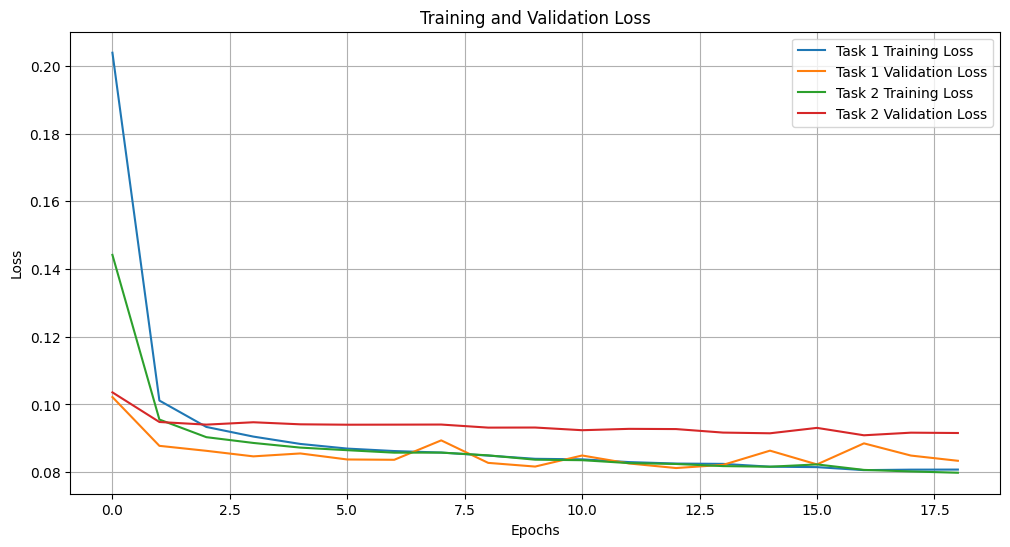

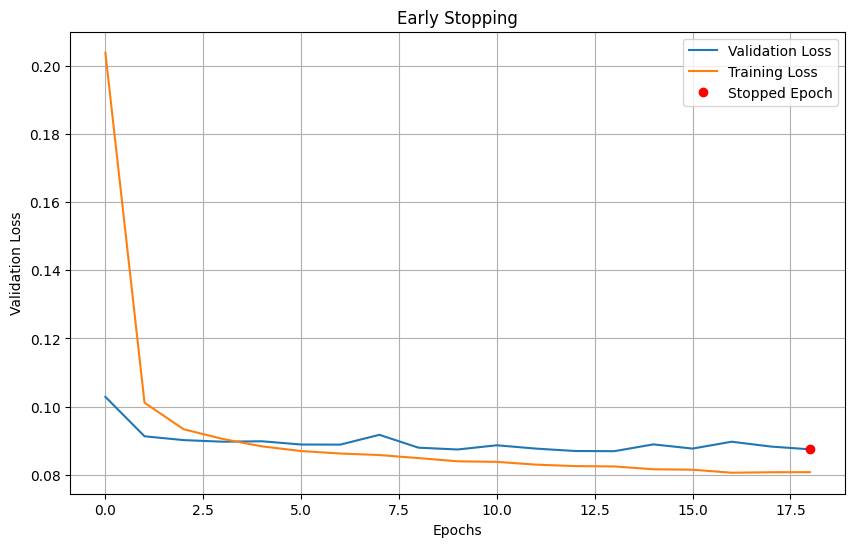

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

x_task1 = np.random.rand(1000, 10)
x_task2 = np.random.rand(1000, 10)  
y_task1 = np.random.rand(1000, 1) 
y_task2 = np.random.rand(1000, 1) 
 
input_layer = Input(shape=(10,))

branch_task1 = Dense(64, activation='relu')(input_layer)
output_task1 = Dense(1, name='output_task1')(branch_task1)

branch_task2 = Dense(64, activation='relu')(input_layer)
output_task2 = Dense(1, name='output_task2')(branch_task2)

model_task1 = Model(inputs=input_layer, outputs=output_task1)
model_task2 = Model(inputs=input_layer, outputs=output_task2)

model_task1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_task2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

multitask_model = Model(inputs=input_layer, outputs=[output_task1, output_task2])

multitask_model.compile(optimizer='adam',
                        loss={'output_task1': 'mean_squared_error',
                              'output_task2': 'mean_squared_error'},
                        loss_weights={'output_task1': 0.5, 'output_task2': 0.5},
                        metrics={'output_task1': 'mae', 'output_task2': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = multitask_model.fit(x_task1, [y_task1, y_task2], validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Task 1 Training Loss')
plt.plot(history.history['val_output_task1_loss'], label='Task 1 Validation Loss')
plt.plot(history.history['output_task2_loss'], label='Task 2 Training Loss')
plt.plot(history.history['val_output_task2_loss'], label='Task 2 Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Early Stopping
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(early_stopping.stopped_epoch, history.history['val_loss'][early_stopping.stopped_epoch], 'ro', label='Stopped Epoch')
plt.title('Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

max_features = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

def predict_sentiment(text, model, maxlen=maxlen):
    tokens = imdb.get_word_index()
    tokens = {k: (v + 3) for k, v in tokens.items()}
    tokens["<PAD>"] = 0
    tokens["<START>"] = 1
    tokens["<UNK>"] = 2
    tokens["<UNUSED>"] = 3
    
    reverse_tokens = dict([(value, key) for (key, value) in tokens.items()])
    
    sequence = [tokens.get(word, tokens["<UNK>"]) for word in text.split()]
    sequence = pad_sequences([sequence], maxlen=maxlen)
    
    prediction = model.predict(sequence)[0, 0]
    sentiment = "positive" if prediction >= 0.5 else "negative"
    return sentiment, prediction

#text1 = "This movie was great! I really enjoyed it."
#text2 = "The acting was terrible and the plot was boring."



text1= input(" ENTER YOUR TEXT : ")
text2= input ("ENTER SECOND TEXT : ")

sentiment1, score1 = predict_sentiment(text1, model)
sentiment2, score2 = predict_sentiment(text2, model)

print(f"Text: '{text1}' | Sentiment: {sentiment1} | Score: {score1:.4f}")
print(f"Text: '{text2}' | Sentiment: {sentiment2} | Score: {score2:.4f}")